# Pergunta: Desde 2018, quais pessoas foram mais atuantes na Amazônia Legal com relação ao poder público?

Acredita-se que o Instituto Arapyaú possui diversas frentes em relação à projetos para desenvolvimento de uma Amazônia Legal mais sustentável. Pensando nisso, para fortificar ainda mais a rede de contatos do instituto e diminuir o caminho entre uma idéia e uma ação, temos a intenção de rankear os estados com mais projetos vindo do poder público para saber onde poderia haver uma priorização.

Também, para um resultado satisfatório de uma rede de conexões, encontra-se os políticos mais atuantes em cada estado e em cada área de projeto. Dessa maneira, é possível eleger projetos com representantes que estão sempre buscando o bem da sociedade.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 39.1 MB/s 
     |████████████████████████████████| 16.7 MB 33.2 MB/s 


In [ ]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


### Imports

In [60]:
# Imports
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import shapefile as shp
import geopandas as gpd

### Carrega os Dados

In [11]:
# Carrega os dados
dados = pd.read_csv("/content/drive/MyDrive/BCG Gamma Challenge/dados/Emendas.csv", sep=";", encoding="latin-1")
dados.head()




,Código da Emenda,Ano da Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Código IBGE Município,Nome Município,Código IBGE Estado,Nome Estado,Código Região,...,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
0,201534200006,2015,3420,ABELARDO LUPION,6,4106902,CURITIBA,4100000,PARANÁ,S,...,10,Saúde,301,Atenção básica,"789725,00","0,00","0,00","0,00","0,00","789725,00"
1,201534200007,2015,3420,ABELARDO LUPION,7,4107751,FIGUEIRA,4100000,PARANÁ,S,...,15,Urbanismo,451,infra-estrutura urbana,"1400000,00","0,00","0,00","483843,36","0,00","936766,32"
2,201534200010,2015,3420,ABELARDO LUPION,10,4109708,IBAITI,4100000,PARANÁ,S,...,15,Urbanismo,451,infra-estrutura urbana,"1400000,00","0,00","0,00","0,00","0,00","1400000,00"
3,201534200013,2015,3420,ABELARDO LUPION,13,4111803,JACAREZINHO,4100000,PARANÁ,S,...,10,Saúde,301,Atenção básica,"500000,00","0,00","0,00","0,00","0,00","500000,00"
4,201534200014,2015,3420,ABELARDO LUPION,14,4111803,JACAREZINHO,4100000,PARANÁ,S,...,10,Saúde,122,Administração geral,"231800,00","0,00","0,00","0,00","0,00","231800,00"


### Filtragem

In [12]:
# Filtra dados após 2018 
dados = dados[dados['Ano da Emenda'] >= 2018]

In [14]:
estados_amazonia_legal = {'ACRE', 'AMAZONAS', 'RORAIMA', 'RONDÔNIA', 'MATO GROSSO', 'PARÁ', 'AMAPÁ', 'TOCANTINS', 'MARANHÃO'}
estados_n_amazonia = ['Sem informação', 'SÃO PAULO', 'PARANÁ', 'CEARÁ', 'PERNAMBUCO', 'PIAUÍ', 'MINAS GERAIS', 'SERGIPE', 'BAHIA', 'PARAÍBA', 'DISTRITO FEDERAL', 'GOIÁS', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'ALAGOAS', 'SANTA CATARINA', 'ESPÍRITO SANTO', 'MATO GROSSO DO SUL']



#print(dados['Nome Estado'].unique())
#dados.head()

In [17]:
# Encontra os dados da amazonia legal
dados_amazonia_legal = dados[dados['Nome Estado'].isin(estados_amazonia_legal)]
dados_resto = dados[~dados['Nome Estado'].isin(estados_amazonia_legal)]

### Contagem de Emendas por Estado/Atividade/Autor

In [40]:
# Conta numero de emendas por funcao e por autor
n_emendas = dados_amazonia_legal.groupby(['Nome Função', 'Nome do Autor da Emenda', 'Nome Estado'])[['Nome do Autor da Emenda']].count().rename(columns = {'Nome do Autor da Emenda': 'Numero de Emendas'})

In [41]:
# Reseta o index para organizar o dataset
n_emendas = n_emendas.reset_index()

In [90]:
# Total de Emendas por estado
n_emendas_total = n_emendas['Nome Estado'].value_counts().reset_index().rename(columns = {'index': 'Estado', 'Nome Estado': "Numero Emendas"})

In [42]:
# Funções que queremos dar priorizacao
funcoes_selecionadas = ['Educação','Assistência social', 'Gestão Ambiental', 'Habitação', 'Indústria', 'Saúde','Trabalho']

In [43]:
# Filtra o dataset com emendas selecionadas
n_emendas_sel = n_emendas[n_emendas['Nome Função'].isin(funcoes_selecionadas)]

In [44]:
# Rankeamento
n_emendas_sel.sort_values(['Numero de Emendas'], ascending = False)

,Nome Função,Nome do Autor da Emenda,Nome Estado,Numero de Emendas
1093,Saúde,JUAREZ COSTA,MATO GROSSO,52
1126,Saúde,MARRECA FILHO,MARANHÃO,47
988,Saúde,ANDRE ABDON,AMAPÁ,41
1030,Saúde,DELEGADO EDER MAURO,PARÁ,33
1152,Saúde,PROFESSORA MARCIVANIA,AMAPÁ,29
...,...,...,...,...
774,Educação,LUIZ CARLOS,AMAPÁ,1
775,Educação,LUIZ CLAUDIO,RONDÔNIA,1
776,Educação,LUIZA ERUNDINA,MARANHÃO,1
781,Educação,MARCIO BITTAR,ACRE,1


In [56]:
# Agrupamento por Estado
n_emendas_sel[n_emendas_sel['Nome Função'] == 'Saúde'].groupby('Nome Estado')['Nome Estado','Nome do Autor da Emenda', 'Numero de Emendas'].head(3).reset_index().sort_values(['Nome Estado', 'Numero de Emendas'], ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,index,Nome Estado,Nome do Autor da Emenda,Numero de Emendas
15,994,TOCANTINS,ATAIDES OLIVEIRA,25
19,998,TOCANTINS,BANCADA DE TOCANTINS,10
25,1015,TOCANTINS,CARLOS HENRIQUE GAGUIM,9
11,990,RORAIMA,ANGELA PORTELA,7
0,979,RORAIMA,ABEL MESQUITA JR.,3
18,997,RORAIMA,BANCADA DE RORAIMA,2
2,981,RONDÔNIA,ACIR GURGACZ,12
26,1026,RONDÔNIA,CONFUCIO MOURA,8
17,996,RONDÔNIA,BANCADA DE RONDONIA,6
23,1004,PARÁ,BANCADA DO PARA,15


In [77]:
# Abre arquivos .shp para plot do gráfico do Brasil
df = gpd.read_file('/content/drive/MyDrive/BCG Gamma Challenge/dados/Geografia/BR_UF_2021.shp')
df.head()


,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."


In [83]:
# Procura apenas os estados da amazonia legal
df_amazonia = df[df['NM_UF'].str.upper().isin(estados_amazonia_legal)]

In [96]:
df_amazonia['NM_UF'] = df_amazonia['NM_UF'].str.upper()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [99]:
df_amazonia.head()

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,RONDÔNIA,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,ACRE,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,AMAZONAS,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,RORAIMA,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,PARÁ,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."


O estado do Pará é o que mais tem emendas direcionadas, ou seja, onde há mais atuação política e talvez mais desenvolvimento estadual. Por outro lado, Rondônia é o estado com menos direcionamento de verbas através das emendas.

In [103]:
# Concatena as informacoes do mapa com o nome dos estados
df_amazonia_merged = pd.merge(left = df_amazonia, right = n_emendas_total, left_on = 'NM_UF', right_on = 'Estado')

In [105]:
# Remove uma das colunas de estado
df_amazonia_merged = df_amazonia_merged.drop(['NM_UF'], axis = 1)

In [141]:
# Adiciona as coordenadas de centro de cada estado
df_amazonia_merged['coords'] = df_amazonia_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
df_amazonia_merged['coords'] = [coords[0] for coords in df_amazonia_merged['coords']]

### Plots para Apresentação

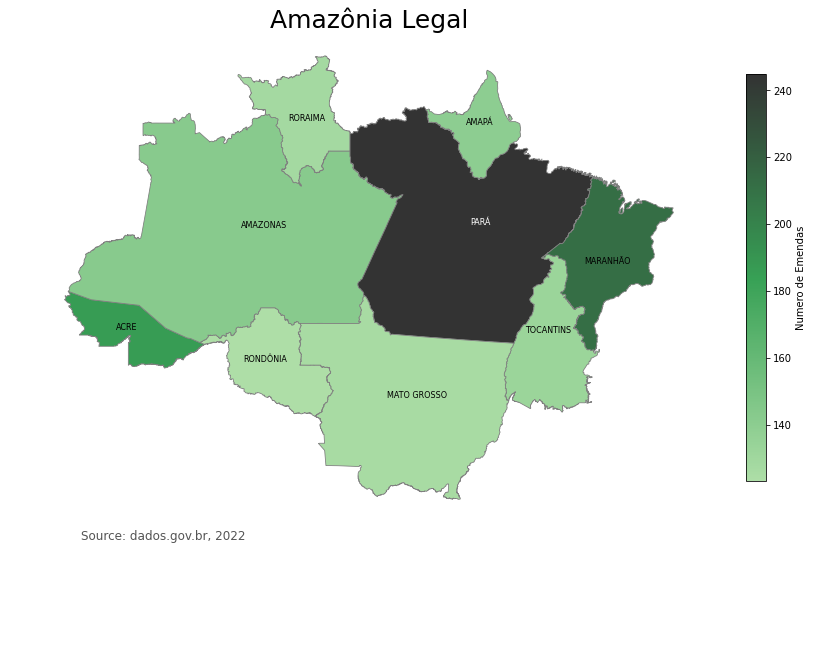

In [181]:
# Variavel a ser visualizada
variable = 'Numero Emendas'
# Min e Max do colobar
vmin, vmax = n_emendas_total['Numero Emendas'].min(), n_emendas_total['Numero Emendas'].max()

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot do mapa da amazonia legal
df_amazonia_merged.plot(column=variable, cmap=sns.color_palette("Greens_d", 10, as_cmap = True), linewidth=0.8, ax=ax, edgecolor='0.5')

# Edita o grafico
ax.axis('off')

ax.set_title('Amazônia Legal', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.annotate('Source: dados.gov.br, 2022',xy=(0.1, .18), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Cria um colorbar com a paletta escolhida
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("Greens_d", 10, as_cmap = True), norm=plt.Normalize(vmin=vmin, vmax=vmax))


# Adiciona o colorbar ao grafico
cbar = fig.colorbar(sm, shrink=0.50)
cbar.set_label('Numero de Emendas', rotation=-270)

# Coloca nome dos estados de acordo com a coordenada
for idx, row in df_amazonia_merged.iterrows():
    if row['Estado'] == 'PARÁ':
      plt.annotate(s=row['Estado'], xy=row['coords'],
                  horizontalalignment='center', color = 'white', size = 8)
    else:
      plt.annotate(s=row['Estado'], xy=row['coords'],
                 horizontalalignment='center', size = 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


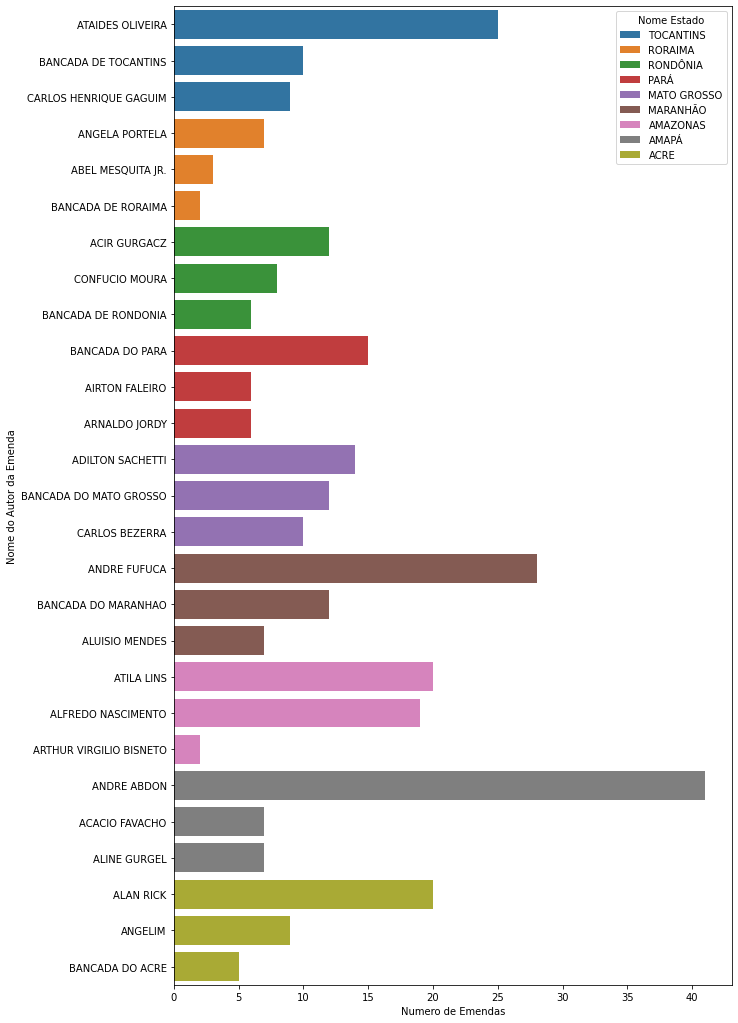

In [179]:
# Plota um gráfico dos mais atuantes por estado, de acordo com uma funcao
funcao = 'Saúde'

df_aux_funcao = n_emendas_sel[n_emendas_sel['Nome Função'] == funcao].groupby('Nome Estado')['Nome Estado','Nome do Autor da Emenda', 'Numero de Emendas'].head(3).reset_index().sort_values(['Nome Estado', 'Numero de Emendas'], ascending = False)

plt.figure(1, figsize = (10,18))
sns.barplot(y = 'Nome do Autor da Emenda', x = 'Numero de Emendas', dodge = False, hue = 'Nome Estado', data = df_aux_funcao)